***TP: European Options***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lng
import time

In [10]:
#Paramètres:

SCHEME = "IE" # "EE" ou "IE" ou "CN"

K = 100
Smin = 0
Smax = 200
T = 1
sigma = 0.2
r = 0.1

N = 50
I = 20

In [11]:
#Pas de discrétisation:
h = (Smax - Smin) / (I + 1)
delta_t = T/N

s = Smin + h*np.arange(1, I+1)
t = delta_t*np.arange(0, N+1)

alpha = 0.5 * (sigma**2) / (h**2) * s**2

beta = 0.5 * r / h * s

In [12]:
U0 = np.maximum(K - s, 0)

vleft = K * np.exp(-r * t[0]) - Smin
vright = 0

A = np.zeros((I, I))
for i in range(I):
    A[i, i] = 2 * alpha[i] + r
    if i > 0:
        A[i, i - 1] = -alpha[i] + beta[i]
    if i < I - 1:
        A[i, i + 1] = -alpha[i] - beta[i]


U = U0.reshape(-1, 1)
q = np.zeros((I, 1))

#print(U0)
#On vérifie que la matrice est bien tridiagonale
#print(A)

In [13]:
t0 = time.time()

if SCHEME == "EE":
    for n in range(N + 1):
        vleft = K * np.exp(-r * t[n]) - Smin
        q[0] = (-alpha[0] + beta[0]) * vleft
        U = U - delta_t * (A @ U + q)
        
elif SCHEME == "IE":
    M = np.identity(I) + delta_t * A
    for n in range(N + 1):
        vleft = K * np.exp(-r * t[n]) - Smin
        q[0] = (-alpha[0] + beta[0]) * vleft
        q[-1] = (-alpha[-1] - beta[-1]) * vright
        U = np.linalg.solve(M, U - delta_t * q)
        U = U.reshape(-1, 1)

elif SCHEME == "CN":
    M = np.identity(I) + delta_t * A
    C = np.identity(I) - delta_t * A
    for n in range(N + 1):
        vleft = K * np.exp(-r * t[n]) - Smin
        q[0] = (-alpha[0] + beta[0]) * vleft
        q[-1] = (-alpha[-1] - beta[-1]) * vright
        U = np.linalg.solve(M, C @ U - delta_t * q)
        U = U.reshape(-1, 1)

t1 = time.time()
print('tcpu = %5.2f' % (t1 - t0))
#print (U)
#print(U_imp)

tcpu =  0.02


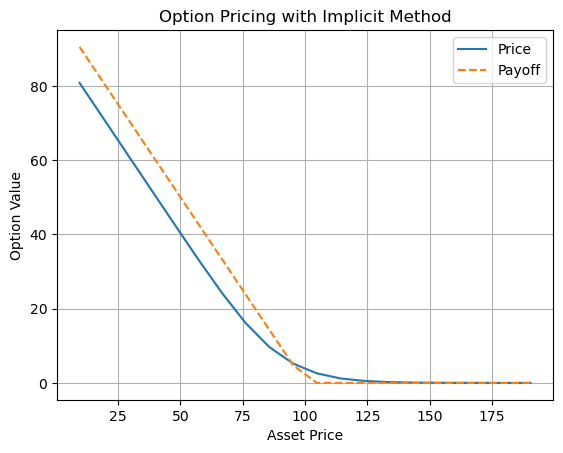

In [14]:
plt.grid()
plt.plot(s, U.flatten(), label="Price")
plt.plot(s, U0, '--', label="Payoff")
plt.legend()
plt.xlabel("Asset Price")
plt.ylabel("Option Value")
if SCHEME == "EE":
    plt.title("Option Pricing with Explicit Method")
elif SCHEME == "IE":
    plt.title("Option Pricing with Implicit Method")
elif SCHEME == "CN":
    plt.title("Option Pricing with Crank-Nicolson Method")
plt.show()